In [2]:
import pandas as pd
import ast

In [3]:
df = pd.read_csv('attribution_allocation_student_data.csv')
df.head(20)

,convert_TF,touch1,touch2,touch3,touch4,touch5,tier
0,True,referral,referral,referral,email,NaN,1
1,True,referral,display,display,email,NaN,1
2,True,email,display,referral,NaN,NaN,1
3,True,referral,referral,email,NaN,NaN,1
4,True,social,referral,NaN,NaN,NaN,1
5,True,referral,referral,email,NaN,NaN,1
6,True,email,referral,referral,NaN,NaN,1
7,True,email,referral,referral,referral,NaN,1
8,True,referral,NaN,NaN,NaN,NaN,1
9,True,referral,referral,email,NaN,NaN,1


In [4]:
input_file = pd.read_csv('channel_spend_student_data.csv', skiprows=1, names = ['tier', 'spend'])
input_file

,tier,spend
0,tier1,"{'email': 1000.0, 'social': 1000.0000000000001..."
1,tier2,"{'email': 2000.0, 'social': 2000.0, 'display':..."
2,tier3,"{'email': 3000.0, 'social': 3000.0, 'display':..."


# calculate cost for each channel

In [5]:
input_file['spend']=input_file['spend'].apply(ast.literal_eval)

In [6]:
tier1_spend_dict = input_file.iloc[0,1]
tier2_spend_dict = input_file.iloc[1,1]
tier3_spend_dict = input_file.iloc[2,1]

In [7]:
tier1_spend = pd.DataFrame(list(tier1_spend_dict.items()),columns = ['channel','spend'])
tier2_spend = pd.DataFrame(list(tier2_spend_dict.items()),columns = ['channel','spend'])
tier3_spend = pd.DataFrame(list(tier3_spend_dict.items()),columns = ['channel','spend'])

In [8]:
tier1 = df[df['tier'] == 1]
tier2 = df[df['tier'] == 2]
tier3 = df[df['tier'] == 3]

# Linear Model

In [9]:
convert1 = tier1[tier1['convert_TF'] == True]
convert2 = tier2[tier2['convert_TF'] == True]
convert3 = tier3[tier3['convert_TF'] == True]
print(convert1)
print(convert2)
print(convert3)

       convert_TF    touch1    touch2          touch3  touch4    touch5  tier
0            True  referral  referral        referral   email       NaN     1
1            True  referral   display         display   email       NaN     1
2            True     email   display        referral     NaN       NaN     1
3            True  referral  referral           email     NaN       NaN     1
4            True    social  referral             NaN     NaN       NaN     1
...           ...       ...       ...             ...     ...       ...   ...
4304         True  referral  referral        referral     NaN       NaN     1
4305         True  referral  referral          social  social  referral     1
11333        True  referral  referral  organic_search     NaN       NaN     1
11334        True  referral  referral  organic_search     NaN       NaN     1
11347        True  referral  referral             NaN     NaN       NaN     1

[2824 rows x 7 columns]
       convert_TF          touch1    to

In [10]:
convert1_combined = convert1.iloc[:,1:6]
convert1_combined

,touch1,touch2,touch3,touch4,touch5
0,referral,referral,referral,email,NaN
1,referral,display,display,email,NaN
2,email,display,referral,NaN,NaN
3,referral,referral,email,NaN,NaN
4,social,referral,NaN,NaN,NaN
...,...,...,...,...,...
4304,referral,referral,referral,NaN,NaN
4305,referral,referral,social,social,referral
11333,referral,referral,organic_search,NaN,NaN
11334,referral,referral,organic_search,NaN,NaN


In [11]:
convert1_combined['combined']= convert1_combined.values.tolist()
convert1_combined.drop(convert1_combined.iloc[:, 0:5], inplace=True, axis=1)
convert1_combined

,combined
0,"[referral, referral, referral, email, nan]"
1,"[referral, display, display, email, nan]"
2,"[email, display, referral, nan, nan]"
3,"[referral, referral, email, nan, nan]"
4,"[social, referral, nan, nan, nan]"
...,...
4304,"[referral, referral, referral, nan, nan]"
4305,"[referral, referral, social, social, referral]"
11333,"[referral, referral, organic_search, nan, nan]"
11334,"[referral, referral, organic_search, nan, nan]"


In [12]:
touch_list_convert1 = convert1_combined['combined'].dropna().tolist()
touch_list_convert1

[['referral', 'referral', 'referral', 'email', nan],
 ['referral', 'display', 'display', 'email', nan],
 ['email', 'display', 'referral', nan, nan],
 ['referral', 'referral', 'email', nan, nan],
 ['social', 'referral', nan, nan, nan],
 ['referral', 'referral', 'email', nan, nan],
 ['email', 'referral', 'referral', nan, nan],
 ['email', 'referral', 'referral', 'referral', nan],
 ['referral', nan, nan, nan, nan],
 ['referral', 'referral', 'email', nan, nan],
 ['email', 'social', 'social', nan, nan],
 ['email', 'referral', 'email', nan, nan],
 ['email', nan, nan, nan, nan],
 ['paid_search', 'email', nan, nan, nan],
 ['email', 'referral', nan, nan, nan],
 ['paid_search', 'referral', 'email', 'email', nan],
 ['email', 'referral', 'email', nan, nan],
 ['referral', 'referral', 'email', nan, nan],
 ['email', 'referral', 'paid_search', nan, nan],
 ['referral', 'email', nan, nan, nan],
 ['paid_search', 'social', 'email', nan, nan],
 ['referral', 'email', nan, nan, nan],
 ['referral', 'referral',

In [13]:
for i in range(len(touch_list_convert1)):
    touch_list_convert1[i] = [x for x in touch_list_convert1[i] if str(x) != 'nan']
touch_list_convert1

[['referral', 'referral', 'referral', 'email'],
 ['referral', 'display', 'display', 'email'],
 ['email', 'display', 'referral'],
 ['referral', 'referral', 'email'],
 ['social', 'referral'],
 ['referral', 'referral', 'email'],
 ['email', 'referral', 'referral'],
 ['email', 'referral', 'referral', 'referral'],
 ['referral'],
 ['referral', 'referral', 'email'],
 ['email', 'social', 'social'],
 ['email', 'referral', 'email'],
 ['email'],
 ['paid_search', 'email'],
 ['email', 'referral'],
 ['paid_search', 'referral', 'email', 'email'],
 ['email', 'referral', 'email'],
 ['referral', 'referral', 'email'],
 ['email', 'referral', 'paid_search'],
 ['referral', 'email'],
 ['paid_search', 'social', 'email'],
 ['referral', 'email'],
 ['referral', 'referral', 'email'],
 ['email', 'referral', 'email'],
 ['social', 'email'],
 ['referral', 'referral', 'referral', 'social', 'email'],
 ['email', 'referral'],
 ['email', 'display'],
 ['social', 'referral', 'referral', 'email'],
 ['email'],
 ['referral', 'r

In [14]:
counts = dict()



for i in range(len(touch_list_convert1)):
    if len(touch_list_convert1[i]) == 2:
        for j in range(len(touch_list_convert1[i])):
            counts[touch_list_convert1[i][j]] = counts.get(touch_list_convert1[i][j],0)+0.5
    elif len(touch_list_convert1[i]) == 3:
        for j in range(len(touch_list_convert1[i])):
            counts[touch_list_convert1[i][j]] = counts.get(touch_list_convert1[i][j],0)+ 1/3
    elif len(touch_list_convert1[i]) == 4:
        for j in range(len(touch_list_convert1[i])):
            counts[touch_list_convert1[i][j]] = counts.get(touch_list_convert1[i][j],0)+ 1/4
    elif len(touch_list_convert1[i]) == 5:
        for j in range(len(touch_list_convert1[i])):
            counts[touch_list_convert1[i][j]] = counts.get(touch_list_convert1[i][j],0)+ 1/5
    else:
        for j in range(len(touch_list_convert1[i])):
            counts[touch_list_convert1[i][j]] = counts.get(touch_list_convert1[i][j],0)+ 1

counts



{'referral': 1517.0999999999979,
 'email': 251.13333333333372,
 'display': 439.26666666666273,
 'social': 484.583333333328,
 'paid_search': 128.04999999999984,
 'direct': 1.9166666666666665,
 'organic_search': 1.9499999999999997}

In [15]:
convert_tier1 = pd.DataFrame(list(counts.items()),columns = ['channel','converts'])
convert_tier1

,channel,converts
0,referral,1517.100000
1,email,251.133333
2,display,439.266667
3,social,484.583333
4,paid_search,128.050000
5,direct,1.916667
6,organic_search,1.950000


In [16]:
convert2_combined = convert2.iloc[:,1:6]
convert2_combined['combined']= convert2_combined.values.tolist()
convert2_combined.drop(convert2_combined.iloc[:, 0:5], inplace=True, axis=1)
convert2_combined

,combined
11354,"[display, referral, referral, email, nan]"
11355,"[referral, referral, email, nan, nan]"
11356,"[email, social, social, nan, nan]"
11357,"[social, email, nan, nan, nan]"
11358,"[email, referral, email, nan, nan]"
...,...
26941,"[referral, email, nan, nan, nan]"
26942,"[referral, referral, referral, nan, nan]"
34041,"[organic_search, referral, referral, nan, nan]"
34042,"[referral, referral, organic_search, nan, nan]"


In [17]:
touch_list_convert2 = convert2_combined['combined'].dropna().tolist()
touch_list_convert2

[['display', 'referral', 'referral', 'email', nan],
 ['referral', 'referral', 'email', nan, nan],
 ['email', 'social', 'social', nan, nan],
 ['social', 'email', nan, nan, nan],
 ['email', 'referral', 'email', nan, nan],
 ['referral', 'email', nan, nan, nan],
 ['referral', nan, nan, nan, nan],
 ['referral', 'referral', 'referral', 'email', nan],
 ['paid_search', 'referral', 'referral', nan, nan],
 ['referral', 'referral', 'email', nan, nan],
 ['referral', 'referral', 'referral', 'email', nan],
 ['email', 'display', 'email', nan, nan],
 ['referral', 'social', nan, nan, nan],
 ['referral', 'referral', 'social', 'email', 'email'],
 ['social', 'social', 'email', nan, nan],
 ['referral', 'email', nan, nan, nan],
 ['email', nan, nan, nan, nan],
 ['referral', 'display', 'referral', 'referral', 'email'],
 ['referral', 'referral', 'email', nan, nan],
 ['paid_search', 'referral', 'display', 'referral', 'email'],
 ['referral', 'referral', 'email', nan, nan],
 ['email', nan, nan, nan, nan],
 ['refe

In [18]:
for i in range(len(touch_list_convert2)):
    touch_list_convert2[i] = [x for x in touch_list_convert2[i] if str(x) != 'nan']
touch_list_convert2

[['display', 'referral', 'referral', 'email'],
 ['referral', 'referral', 'email'],
 ['email', 'social', 'social'],
 ['social', 'email'],
 ['email', 'referral', 'email'],
 ['referral', 'email'],
 ['referral'],
 ['referral', 'referral', 'referral', 'email'],
 ['paid_search', 'referral', 'referral'],
 ['referral', 'referral', 'email'],
 ['referral', 'referral', 'referral', 'email'],
 ['email', 'display', 'email'],
 ['referral', 'social'],
 ['referral', 'referral', 'social', 'email', 'email'],
 ['social', 'social', 'email'],
 ['referral', 'email'],
 ['email'],
 ['referral', 'display', 'referral', 'referral', 'email'],
 ['referral', 'referral', 'email'],
 ['paid_search', 'referral', 'display', 'referral', 'email'],
 ['referral', 'referral', 'email'],
 ['email'],
 ['referral', 'referral', 'email'],
 ['social', 'referral', 'email'],
 ['email'],
 ['referral', 'referral', 'email'],
 ['referral', 'referral', 'referral', 'email'],
 ['email', 'referral', 'referral', 'referral'],
 ['referral', 'ref

In [19]:
counts = dict()



for i in range(len(touch_list_convert2)):
    if len(touch_list_convert2[i]) == 2:
        for j in range(len(touch_list_convert2[i])):
            counts[touch_list_convert2[i][j]] = counts.get(touch_list_convert2[i][j],0)+0.5
    elif len(touch_list_convert2[i]) == 3:
        for j in range(len(touch_list_convert2[i])):
            counts[touch_list_convert2[i][j]] = counts.get(touch_list_convert2[i][j],0)+ 1/3
    elif len(touch_list_convert2[i]) == 4:
        for j in range(len(touch_list_convert2[i])):
            counts[touch_list_convert2[i][j]] = counts.get(touch_list_convert2[i][j],0)+ 1/4
    elif len(touch_list_convert2[i]) == 5:
        for j in range(len(touch_list_convert2[i])):
            counts[touch_list_convert2[i][j]] = counts.get(touch_list_convert2[i][j],0)+ 1/5
    else:
        for j in range(len(touch_list_convert2[i])):
            counts[touch_list_convert2[i][j]] = counts.get(touch_list_convert2[i][j],0)+ 1

counts

{'display': 724.0833333333404,
 'referral': 2656.683333333344,
 'email': 442.51666666666245,
 'social': 822.3666666666782,
 'paid_search': 237.81666666666717,
 'organic_search': 6.466666666666666,
 'direct': 2.0666666666666664}

In [20]:
convert_tier2 = pd.DataFrame(list(counts.items()),columns = ['channel','converts'])
convert_tier2

,channel,converts
0,display,724.083333
1,referral,2656.683333
2,email,442.516667
3,social,822.366667
4,paid_search,237.816667
5,organic_search,6.466667
6,direct,2.066667


In [21]:
convert3_combined = convert3.iloc[:,1:6]
convert3_combined['combined']= convert3_combined.values.tolist()
convert3_combined.drop(convert3_combined.iloc[:, 0:5], inplace=True, axis=1)
convert3_combined

,combined
34062,"[referral, referral, referral, email, nan]"
34063,"[email, email, social, nan, nan]"
34064,"[referral, referral, email, nan, nan]"
34065,"[email, referral, referral, nan, nan]"
34066,"[email, referral, referral, nan, nan]"
...,...
60648,"[referral, referral, referral, nan, nan]"
60649,"[display, referral, nan, nan, nan]"
68103,"[organic_search, referral, paid_search, nan, nan]"
68104,"[organic_search, display, nan, nan, nan]"


In [22]:
touch_list_convert3 = convert3_combined['combined'].dropna().tolist()
touch_list_convert3

[['referral', 'referral', 'referral', 'email', nan],
 ['email', 'email', 'social', nan, nan],
 ['referral', 'referral', 'email', nan, nan],
 ['email', 'referral', 'referral', nan, nan],
 ['email', 'referral', 'referral', nan, nan],
 ['email', 'referral', nan, nan, nan],
 ['email', 'referral', 'referral', nan, nan],
 ['email', 'referral', 'referral', nan, nan],
 ['email', nan, nan, nan, nan],
 ['email', nan, nan, nan, nan],
 ['email', nan, nan, nan, nan],
 ['referral', 'referral', 'referral', 'referral', 'email'],
 ['referral', 'referral', 'referral', nan, nan],
 ['referral', 'display', 'referral', 'referral', 'email'],
 ['referral', 'paid_search', 'email', nan, nan],
 ['referral', 'email', nan, nan, nan],
 ['referral', 'email', nan, nan, nan],
 ['email', 'referral', 'referral', 'paid_search', 'email'],
 ['referral', 'referral', 'email', nan, nan],
 ['email', 'display', nan, nan, nan],
 ['email', 'referral', 'referral', nan, nan],
 ['email', 'referral', 'referral', nan, nan],
 ['email',

In [23]:
for i in range(len(touch_list_convert3)):
    touch_list_convert3[i] = [x for x in touch_list_convert3[i] if str(x) != 'nan']
touch_list_convert3

[['referral', 'referral', 'referral', 'email'],
 ['email', 'email', 'social'],
 ['referral', 'referral', 'email'],
 ['email', 'referral', 'referral'],
 ['email', 'referral', 'referral'],
 ['email', 'referral'],
 ['email', 'referral', 'referral'],
 ['email', 'referral', 'referral'],
 ['email'],
 ['email'],
 ['email'],
 ['referral', 'referral', 'referral', 'referral', 'email'],
 ['referral', 'referral', 'referral'],
 ['referral', 'display', 'referral', 'referral', 'email'],
 ['referral', 'paid_search', 'email'],
 ['referral', 'email'],
 ['referral', 'email'],
 ['email', 'referral', 'referral', 'paid_search', 'email'],
 ['referral', 'referral', 'email'],
 ['email', 'display'],
 ['email', 'referral', 'referral'],
 ['email', 'referral', 'referral'],
 ['email', 'display', 'referral'],
 ['email', 'referral'],
 ['display', 'display', 'email'],
 ['display', 'social', 'email'],
 ['email'],
 ['referral', 'email'],
 ['email', 'referral', 'email'],
 ['email', 'referral', 'referral', 'email'],
 ['re

In [24]:
counts = dict()



for i in range(len(touch_list_convert3)):
    if len(touch_list_convert3[i]) == 2:
        for j in range(len(touch_list_convert3[i])):
            counts[touch_list_convert3[i][j]] = counts.get(touch_list_convert3[i][j],0)+0.5
    elif len(touch_list_convert3[i]) == 3:
        for j in range(len(touch_list_convert3[i])):
            counts[touch_list_convert3[i][j]] = counts.get(touch_list_convert3[i][j],0)+ 1/3
    elif len(touch_list_convert3[i]) == 4:
        for j in range(len(touch_list_convert3[i])):
            counts[touch_list_convert3[i][j]] = counts.get(touch_list_convert3[i][j],0)+ 1/4
    elif len(touch_list_convert3[i]) == 5:
        for j in range(len(touch_list_convert3[i])):
            counts[touch_list_convert3[i][j]] = counts.get(touch_list_convert3[i][j],0)+ 1/5
    else:
        for j in range(len(touch_list_convert3[i])):
            counts[touch_list_convert3[i][j]] = counts.get(touch_list_convert3[i][j],0)+ 1

counts

{'referral': 3290.0500000000798,
 'email': 581.449999999998,
 'social': 995.2333333333551,
 'display': 846.1166666666815,
 'paid_search': 338.99999999999864,
 'direct': 3.4166666666666665,
 'organic_search': 7.7333333333333325}

In [25]:
convert_tier3 = pd.DataFrame(list(counts.items()),columns = ['channel','converts'])
convert_tier3

,channel,converts
0,referral,3290.050000
1,email,581.450000
2,social,995.233333
3,display,846.116667
4,paid_search,339.000000
5,direct,3.416667
6,organic_search,7.733333


In [26]:
linear_model_cac1 = pd.merge(convert_tier1, tier1_spend, how='inner', right_on=['channel'],left_on=['channel'])
linear_model_cac2 = pd.merge(convert_tier2, tier2_spend, how='inner', right_on=['channel'],left_on=['channel'])
linear_model_cac3 = pd.merge(convert_tier3, tier3_spend, how='inner', right_on=['channel'],left_on=['channel'])
print(linear_model_cac1)
print(linear_model_cac2)
print(linear_model_cac3)

          channel     converts   spend
0        referral  1517.100000  1000.0
1           email   251.133333  1000.0
2         display   439.266667  1000.0
3          social   484.583333  1000.0
4     paid_search   128.050000  1000.0
5          direct     1.916667     0.0
6  organic_search     1.950000     0.0
          channel     converts   spend
0         display   724.083333  2000.0
1        referral  2656.683333  2000.0
2           email   442.516667  2000.0
3          social   822.366667  2000.0
4     paid_search   237.816667  2000.0
5  organic_search     6.466667     0.0
6          direct     2.066667     0.0
          channel     converts   spend
0        referral  3290.050000  3000.0
1           email   581.450000  3000.0
2          social   995.233333  3000.0
3         display   846.116667  3000.0
4     paid_search   339.000000  3000.0
5          direct     3.416667     0.0
6  organic_search     7.733333     0.0


In [27]:
linear_model_cac1['cac'] = linear_model_cac1['spend']/linear_model_cac1['converts']
linear_model_cac1

,channel,converts,spend,cac
0,referral,1517.100000,1000.0,0.659152
1,email,251.133333,1000.0,3.981949
2,display,439.266667,1000.0,2.276521
3,social,484.583333,1000.0,2.063629
4,paid_search,128.050000,1000.0,7.809449
5,direct,1.916667,0.0,0.000000
6,organic_search,1.950000,0.0,0.000000


In [28]:
linear_model_cac2['cac'] = linear_model_cac2['spend']/linear_model_cac2['converts']
linear_model_cac2

,channel,converts,spend,cac
0,display,724.083333,2000.0,2.762113
1,referral,2656.683333,2000.0,0.752818
2,email,442.516667,2000.0,4.519604
3,social,822.366667,2000.0,2.432005
4,paid_search,237.816667,2000.0,8.409840
5,organic_search,6.466667,0.0,0.000000
6,direct,2.066667,0.0,0.000000


In [29]:
linear_model_cac3['cac'] = linear_model_cac3['spend']/linear_model_cac3['converts']
linear_model_cac3

,channel,converts,spend,cac
0,referral,3290.050000,3000.0,0.911840
1,email,581.450000,3000.0,5.159515
2,social,995.233333,3000.0,3.014368
3,display,846.116667,3000.0,3.545610
4,paid_search,339.000000,3000.0,8.849558
5,direct,3.416667,0.0,0.000000
6,organic_search,7.733333,0.0,0.000000


In [30]:
linear_model_cac = pd.DataFrame()
linear_model_cac['channel'] = linear_model_cac1['channel']
linear_model_cac['converts'] = linear_model_cac1['converts'] + linear_model_cac2['converts'] + linear_model_cac3['converts']
linear_model_cac['spend'] = linear_model_cac1['spend'] + linear_model_cac2['spend'] + linear_model_cac3['spend']
linear_model_cac

,channel,converts,spend
0,referral,5531.233333,6000.0
1,email,3489.266667,6000.0
2,display,1877.016667,6000.0
3,social,2153.066667,6000.0
4,paid_search,704.866667,6000.0
5,direct,11.800000,0.0
6,organic_search,11.750000,0.0


In [31]:
linear_model_cac['cac'] = linear_model_cac['spend']/linear_model_cac['converts']
linear_model_cac

,channel,converts,spend,cac
0,referral,5531.233333,6000.0,1.084749
1,email,3489.266667,6000.0,1.719559
2,display,1877.016667,6000.0,3.196562
3,social,2153.066667,6000.0,2.786723
4,paid_search,704.866667,6000.0,8.512248
5,direct,11.800000,0.0,0.000000
6,organic_search,11.750000,0.0,0.000000


# Allocation

In [38]:
linear_model_tier12 = pd.merge(linear_model_cac1,linear_model_cac2, how='inner', right_on=['channel'],left_on=['channel'])
print(linear_model_tier12)

          channel   converts_x  spend_x     cac_x   converts_y  spend_y  \
0        referral  1517.100000   1000.0  0.659152  2656.683333   2000.0   
1           email   251.133333   1000.0  3.981949   442.516667   2000.0   
2         display   439.266667   1000.0  2.276521   724.083333   2000.0   
3          social   484.583333   1000.0  2.063629   822.366667   2000.0   
4     paid_search   128.050000   1000.0  7.809449   237.816667   2000.0   
5          direct     1.916667      0.0  0.000000     2.066667      0.0   
6  organic_search     1.950000      0.0  0.000000     6.466667      0.0   

      cac_y  
0  0.752818  
1  4.519604  
2  2.762113  
3  2.432005  
4  8.409840  
5  0.000000  
6  0.000000  


In [39]:
linear_model_tier123= pd.merge(linear_model_tier12,linear_model_cac3, how='inner', right_on=['channel'],left_on=['channel'])
print(linear_model_tier123)

          channel   converts_x  spend_x     cac_x   converts_y  spend_y  \
0        referral  1517.100000   1000.0  0.659152  2656.683333   2000.0   
1           email   251.133333   1000.0  3.981949   442.516667   2000.0   
2         display   439.266667   1000.0  2.276521   724.083333   2000.0   
3          social   484.583333   1000.0  2.063629   822.366667   2000.0   
4     paid_search   128.050000   1000.0  7.809449   237.816667   2000.0   
5          direct     1.916667      0.0  0.000000     2.066667      0.0   
6  organic_search     1.950000      0.0  0.000000     6.466667      0.0   

      cac_y     converts   spend       cac  
0  0.752818  3290.050000  3000.0  0.911840  
1  4.519604   581.450000  3000.0  5.159515  
2  2.762113   846.116667  3000.0  3.545610  
3  2.432005   995.233333  3000.0  3.014368  
4  8.409840   339.000000  3000.0  8.849558  
5  0.000000     3.416667     0.0  0.000000  
6  0.000000     7.733333     0.0  0.000000  


In [40]:
linear_model_all =linear_interaction_tier123.drop(columns = ['cac_x','spend_x','spend_y','cac_y','spend','cac'])

In [41]:
linear_model_all

,channel,converts_x,converts_y,converts
0,referral,1517.100000,2656.683333,3290.050000
1,email,251.133333,442.516667,581.450000
2,display,439.266667,724.083333,846.116667
3,social,484.583333,822.366667,995.233333
4,paid_search,128.050000,237.816667,339.000000
5,direct,1.916667,2.066667,3.416667
6,organic_search,1.950000,6.466667,7.733333


In [42]:
linear_model_all['m2-1']=linear_model_all['converts_y']-linear_model_all['converts_x']
linear_model_all['m3-2']=linear_model_all['converts']-linear_model_all['converts_y']
linear_model_all['marginal_spend'] = [1000,1000,1000,1000,1000,0,0]

In [43]:
linear_model_marginal=linear_model_all.drop(columns = ['converts_y','converts'])
linear_model_marginal = linear_model_marginal.rename(columns={'converts_x':'m1'})
linear_model_marginal

,channel,m1,m2-1,m3-2,marginal_spend
0,referral,1517.100000,1139.583333,633.366667,1000
1,email,251.133333,191.383333,138.933333,1000
2,display,439.266667,284.816667,122.033333,1000
3,social,484.583333,337.783333,172.866667,1000
4,paid_search,128.050000,109.766667,101.183333,1000
5,direct,1.916667,0.150000,1.350000,0
6,organic_search,1.950000,4.516667,1.266667,0


In [44]:
linear_model_marginal['marginal_cac1']=linear_model_marginal['marginal_spend']/linear_model_marginal['m1']
linear_model_marginal['marginal_cac2']=linear_model_marginal['marginal_spend']/linear_model_marginal['m2-1']
linear_model_marginal['marginal_cac3']=linear_model_marginal['marginal_spend']/linear_model_marginal['m3-2']
linear_model_marginal

,channel,m1,m2-1,m3-2,marginal_spend,marginal_cac1,marginal_cac2,marginal_cac3
0,referral,1517.100000,1139.583333,633.366667,1000,0.659152,0.877514,1.578864
1,email,251.133333,191.383333,138.933333,1000,3.981949,5.225115,7.197697
2,display,439.266667,284.816667,122.033333,1000,2.276521,3.511030,8.194482
3,social,484.583333,337.783333,172.866667,1000,2.063629,2.960478,5.784805
4,paid_search,128.050000,109.766667,101.183333,1000,7.809449,9.110234,9.883051
5,direct,1.916667,0.150000,1.350000,0,0.000000,0.000000,0.000000
6,organic_search,1.950000,4.516667,1.266667,0,0.000000,0.000000,0.000000


In [50]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x(), 1.03*height, '%.2f' % float(height))

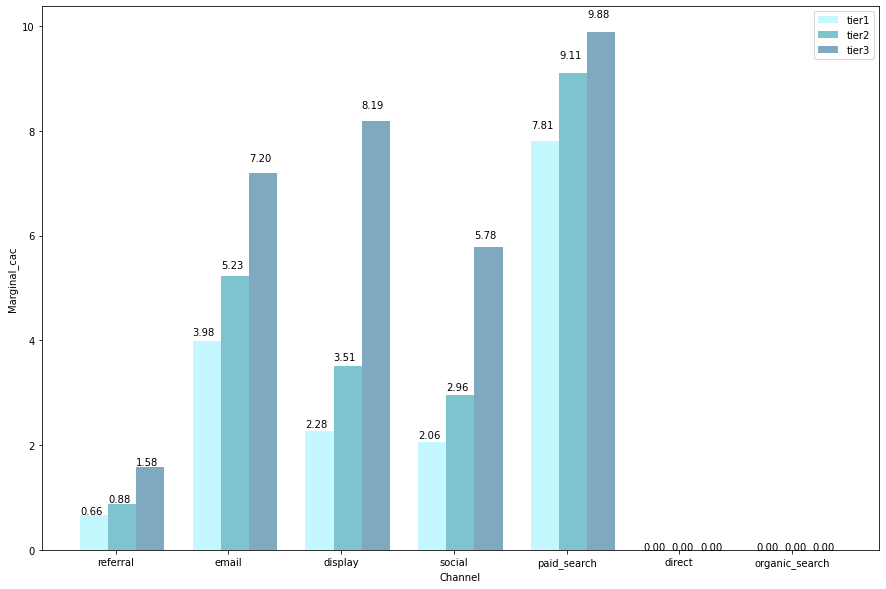

In [54]:
plt.figure(figsize=(15,10))

channel_l = list(linear_model_marginal['channel'])
marginal_cac1_l=list(linear_model_marginal['marginal_cac1'])
marginal_cac2_l=list(linear_model_marginal['marginal_cac2'])
marginal_cac3_l=list(linear_model_marginal['marginal_cac3'])

bar_width=0.25

x =np.arange(7)

a=plt.bar(x,marginal_cac1_l,bar_width,color='#8af1fe',label='tier1',alpha=0.5)
b=plt.bar(x+bar_width,marginal_cac2_l,bar_width,color='#01889f',label='tier2',alpha=0.5)
c=plt.bar(x+bar_width+bar_width,marginal_cac3_l,bar_width,color='#015482',label='tier3',alpha=0.5)


autolabel(a)
autolabel(b)
autolabel(c)

plt.xlabel("Channel")
plt.ylabel("Marginal_cac")

plt.xticks(x+bar_width/1.3,channel_l)

plt.legend()

plt.show()

In [55]:
linear_model_marginal_cac = linear_model_marginal[['channel','marginal_cac1','marginal_cac2','marginal_cac3']]
linear_model_marginal_cac

,channel,marginal_cac1,marginal_cac2,marginal_cac3
0,referral,0.659152,0.877514,1.578864
1,email,3.981949,5.225115,7.197697
2,display,2.276521,3.511030,8.194482
3,social,2.063629,2.960478,5.784805
4,paid_search,7.809449,9.110234,9.883051
5,direct,0.000000,0.000000,0.000000
6,organic_search,0.000000,0.000000,0.000000


Budget allocation:
Referral:3,000 
social:1,000
display:1,000
social:1,000
display:1,000
email:2,000 
social:1,000 